In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
from builtins import range

%matplotlib inline

In [2]:
def get_action(s, w):
    return 1 if s.dot(w) > 0 else 0

In [3]:
def play_one_episode(env, params):
    observation = env.reset()
    done = False

    t = 0
    while not done:
        t += 1
        env.render()
        action = get_action(observation, params)
        observation, reward, done, info = env.step(action)
        
    return t

In [4]:
def play_multiple_episodes(env, n, params):

    episode_lengths = np.empty(n)
    for i in range(n):
        episode_lengths[i] = play_one_episode(env, params)

    avg_length = episode_lengths.mean()
    print("avg length:", avg_length)
    return avg_length

In [5]:
def random_search(env):

    episode_lengths = []
    best = 0
    params = None
    for t in range(100):
        new_params = np.random.random(4)
        avg_length = play_multiple_episodes(env, 100, new_params)
        episode_lengths.append(avg_length)

        if avg_length > best:
            params = new_params
            best = avg_length
    return episode_lengths, params

avg length: 82.24
avg length: 128.03
avg length: 200.0
avg length: 165.82
avg length: 200.0
avg length: 9.46
avg length: 9.64
avg length: 200.0
avg length: 197.6
avg length: 35.3
avg length: 9.59
avg length: 10.38
avg length: 44.26
avg length: 9.73
avg length: 41.05
avg length: 200.0
avg length: 102.51
avg length: 9.82
avg length: 9.71
avg length: 124.77
avg length: 9.84
avg length: 80.6
avg length: 9.42
avg length: 200.0
avg length: 71.31
avg length: 94.93
avg length: 136.08
avg length: 156.93
avg length: 34.37
avg length: 132.11
avg length: 200.0
avg length: 9.64
avg length: 9.76
avg length: 99.18
avg length: 147.79
avg length: 109.13
avg length: 9.45
avg length: 50.58
avg length: 9.66
avg length: 200.0
avg length: 9.73
avg length: 9.88
avg length: 126.29
avg length: 9.57
avg length: 200.0
avg length: 9.57
avg length: 141.72
avg length: 9.68
avg length: 9.6
avg length: 141.94
avg length: 91.04
avg length: 111.5
avg length: 198.48
avg length: 74.41
avg length: 127.24
avg length: 200.0

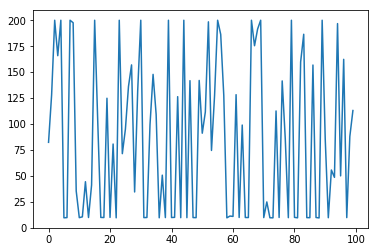

Final weights
avg length: 200.0


In [6]:
if __name__ == '__main__':

    env = gym.make('CartPole-v0')
    episode_lengths, params = random_search(env)
    plt.plot(episode_lengths)
    plt.show()

    print("Final weights")
    play_multiple_episodes(env, 100, params)